# Pipeline, Transformer, Grid Search

## Importation des modules

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Chargement du dataset

In [30]:
data = pd.read_csv("../../datasets/salary.csv")

In [31]:
data.shape

(32561, 15)

## Séparation du Target des autres données

In [32]:
data["salary"].replace([' <=50K',' >50K'], [0,1], inplace=True)
y = data["salary"]

In [33]:
# Obtention des données d'entré non prétraité
df = data.drop(['salary','native-country'], axis=1)

In [34]:
# Récuperation des differentes valeurs unique de nos données categorielle
cat_list = list()
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for column in cat_names:
    for val in df[column].unique():
        cat_list.append(val)
len(cat_list)

60

## Encodage de nos données catégorielles

In [35]:
one_hot = OneHotEncoder()
data_enc = one_hot.fit_transform(df[cat_names])

## Obtention de nos données d'entrée prétraité

In [36]:
df_cat = pd.DataFrame(data_enc.toarray(), columns=cat_list)
df_cat.drop(' ?', axis=1, inplace=True)

In [37]:
df_num = df.drop(cat_names, axis=1)

In [38]:
df_x = pd.concat([df_num, df_cat], axis=1)
df_x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,State-gov,Self-emp-not-inc,Private,Federal-gov,...,Own-child,Unmarried,Other-relative,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Male,Female
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Subdivision de nos données

In [55]:
# subdivision de nos données en données d'entrainement et de test
# x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=4)

## Sélection de modèle: GridSearchCV

In [12]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']} # dictionnaire de nos hyper paramètre avec leurs plages de valeur pour la selection
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5) # implementation de la classe GridSearchCV

In [13]:
# Entrainement de GridSearchCV sur nos données d'entrainement 
# GridSearchCV va chercher la meilleur combinaison possible en fonction des plages de valeur qu'on lui a fournie
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [14]:
# les paramètre obtimaux pour nos données
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17}

In [15]:
# Récuperation du meilleur modèle
model = grid.best_estimator_

In [53]:
model.score(x_train, y_train)

0.8073556511056511

## Sélection de modèle: Pipeline

In [63]:
pipe = make_pipeline(OneHotEncoder(), KNeighborsClassifier())

In [68]:
pipe.fit(x_train, y_train)

[Pipeline] ..... (step 1 of 2) Processing onehotencoder, total=   0.1s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('kneighborsclassifier', KNeighborsClassifier())],
         verbose=True)

In [69]:
pipe.score(x_train, y_train)

0.8747312653562653

## TransformerMixin

In [19]:
# trans_mix = TransformerMixin()
# trans_mix.fit_transform(df, y)

## Les scores

### GridSearchCV

In [20]:
# score sur les données d'entrainement
# model.score(x_train, y_train)

In [21]:
# Meilleur score obtenue par GridSearchCV
# pourquoi grid.best_score_ est different de model.score(x_train, y_train)
grid.best_score_

0.7994471844648031

In [22]:
# score sur les données de test
model.score(x_test, y_test)

0.8025487486565331

### Pipeline

In [71]:
pipe.score(x_test, y_test)

ValueError: Found unknown categories [19491, 20101, 20511, 20809, 20953, 21095, 22154, 22313, 22328, 22546, 22743, 22907, 23233, 23698, 23740, 23940, 24090, 24344, 24529, 24723, 25031, 25045, 25265, 25649, 26880, 26911, 26994, 27012, 27067, 27187, 27332, 27382, 27432, 27624, 27920, 27979, 28031, 28357, 28359, 28366, 28451, 28612, 28952, 28984, 29083, 29240, 29250, 29276, 29375, 29441, 29523, 29571, 29616, 29675, 29807, 29841, 29866, 29909, 30039, 30070, 30226, 30424, 30475, 30565, 30599, 30602, 30813, 31053, 31095, 31102, 31166, 31269, 31365, 31368, 31389, 31573, 31728, 31801, 31807, 32000, 32126, 32214, 32244, 32312, 32334, 32423, 32546, 32604, 32607, 32639, 32650, 32763, 32954, 33002, 33266, 33619, 33662, 33669, 33688, 33886, 33895, 34021, 34091, 34113, 34122, 34127, 34335, 34374, 34701, 35092, 35303, 35429, 35507, 35561, 35663, 36020, 36169, 36186, 36209, 36243, 36364, 36592, 36651, 36956, 36984, 37070, 37202, 37402, 37482, 37720, 37745, 37913, 37918, 37987, 38090, 38310, 38312, 38317, 38397, 38611, 38619, 38721, 39089, 39100, 39150, 39181, 39223, 39386, 39388, 39432, 39484, 39529, 39640, 39764, 40067, 40083, 40295, 40338, 40388, 40512, 40623, 40808, 40856, 40925, 41017, 41258, 41553, 41610, 41777, 41834, 41838, 41938, 42004, 42209, 42617, 43280, 43554, 43599, 43701, 43702, 43764, 43770, 44273, 44308, 44402, 44677, 44694, 44738, 44774, 44777, 44791, 44822, 45054, 45317, 45474, 45487, 45599, 45766, 45814, 46281, 46514, 46699, 46857, 47086, 47247, 47343, 47570, 47871, 48055, 48099, 48214, 48413, 48788, 48925, 48988, 48997, 49179, 49352, 49707, 49837, 50018, 50048, 50282, 50351, 50411, 50474, 50648, 50649, 50700, 50880, 51111, 51271, 51362, 51498, 51664, 51672, 51795, 52156, 52221, 52267, 52465, 52537, 52603, 52795, 52888, 53220, 53407, 53598, 53606, 53684, 53812, 53926, 53930, 54098, 54229, 54257, 54342, 54684, 54825, 55233, 55492, 55658, 56402, 56559, 56630, 56645, 56701, 56929, 57052, 57206, 57211, 57216, 57298, 57413, 57423, 57665, 57698, 58108, 58305, 58597, 58744, 58798, 58916, 59202, 59231, 59367, 59938, 59944, 60116, 60135, 60355, 60562, 60661, 60772, 61307, 61308, 61435, 61559, 61603, 61735, 61751, 61761, 61838, 61855, 61898, 61958, 61985, 62258, 62535, 63000, 63004, 63062, 63079, 63210, 63296, 63299, 63745, 63910, 64045, 64048, 64216, 64289, 64307, 64379, 64643, 64671, 64830, 65545, 65547, 65704, 65730, 65876, 66297, 66460, 66638, 66695, 66824, 66872, 67053, 67083, 67217, 67240, 67662, 67671, 67804, 67841, 67903, 68015, 68037, 68552, 68577, 68895, 69019, 69249, 69285, 69328, 69579, 69758, 70037, 70092, 70209, 70568, 70623, 70868, 70919, 70943, 71009, 71075, 71469, 71540, 71556, 71630, 72593, 72793, 72886, 72931, 72998, 73091, 73292, 73471, 73541, 73559, 73621, 73679, 73839, 74040, 74775, 75012, 75214, 75227, 75363, 75478, 75839, 75890, 76017, 76281, 76317, 76417, 76432, 76491, 76714, 76968, 77207, 77332, 77357, 77516, 77581, 77651, 77845, 78022, 78383, 78410, 78567, 78859, 78875, 78928, 79050, 79331, 79448, 79637, 79682, 79864, 79870, 80158, 80511, 80574, 80743, 80986, 81030, 81206, 81280, 81436, 81513, 81648, 81859, 82465, 82623, 82778, 82804, 82998, 83045, 83089, 83253, 83413, 83508, 83827, 83850, 84197, 84253, 84399, 84648, 84657, 84661, 84787, 85374, 85384, 86111, 86298, 86332, 86701, 86860, 86958, 87006, 87076, 87158, 87169, 87285, 87372, 87523, 87745, 88120, 88432, 88579, 88725, 89146, 89202, 89346, 89478, 89564, 89821, 89870, 89884, 89951, 90222, 90277, 90290, 90377, 90406, 90547, 90624, 90646, 91334, 91433, 91525, 91534, 91689, 91709, 91839, 91901, 91905, 91911, 92028, 92112, 92288, 92691, 92717, 93106, 93223, 93605, 93618, 93662, 93806, 94100, 94193, 94318, 94401, 94606, 94880, 94988, 95078, 95445, 95450, 95577, 95708, 95725, 95799, 95825, 95946, 95989, 95997, 96080, 96178, 96262, 96287, 96321, 96554, 96585, 96586, 96678, 96710, 96824, 96867, 97017, 97077, 97128, 97281, 97634, 97831, 97837, 97939, 98092, 98228, 98281, 98427, 98466, 98637, 98642, 98756, 98829, 98980, 98995, 99219, 99233, 99248, 99339, 99364, 99462, 99491, 99554, 99602, 99784, 99844, 99891, 99925, 100147, 100252, 100462, 100593, 100651, 100681, 100829, 100863, 100997, 101073, 101077, 101096, 101110, 101128, 101146, 101192, 101387, 101500, 101524, 101603, 101761, 101996, 102069, 102103, 102112, 102180, 102193, 102270, 102388, 102420, 102510, 102533, 102631, 102686, 103078, 103148, 103233, 103358, 103459, 103608, 103634, 103654, 103751, 103757, 103966, 103995, 104001, 104421, 104439, 104443, 104455, 104521, 104576, 104632, 104729, 104737, 104830, 105116, 105244, 105428, 105493, 105577, 105585, 105748, 105788, 105794, 105896, 106118, 106175, 106257, 106306, 106491, 106498, 106554, 106700, 107108, 107164, 107308, 107327, 107479, 107617, 107814, 107843, 107895, 107998, 108211, 108256, 108317, 108402, 108454, 108495, 108502, 108569, 108670, 108775, 108779, 108808, 108815, 108926, 109009, 109039, 109193, 109275, 109351, 109430, 109434, 109463, 109482, 109517, 109567, 109667, 109766, 109815, 109854, 109917, 110145, 110213, 110230, 110238, 110257, 110442, 110445, 110517, 110594, 110597, 110610, 110669, 110702, 110798, 110871, 111095, 111130, 111283, 111520, 111679, 111696, 111697, 111772, 111795, 111959, 112263, 112318, 112554, 112761, 112860, 112871, 112941, 113000, 113099, 113175, 113185, 113307, 113309, 113443, 113491, 113501, 113546, 113550, 113654, 113667, 113700, 113868, 113959, 114043, 114117, 114225, 114292, 114401, 114420, 114670, 114754, 114912, 115064, 115258, 115305, 115358, 115389, 115418, 115457, 115497, 115513, 115551, 115705, 115834, 115895, 116367, 116385, 116493, 116539, 116562, 116852, 116933, 116960, 116961, 117018, 117028, 117037, 117162, 117167, 117217, 117253, 117295, 117392, 117503, 117549, 117746, 117847, 117881, 117927, 117959, 118056, 118058, 118081, 118158, 118186, 118308, 118330, 118358, 118365, 118401, 118474, 118481, 118520, 118600, 118792, 118901, 118909, 119287, 119409, 119655, 119762, 119918, 119957, 120046, 120155, 120173, 120326, 120426, 120475, 120508, 120518, 120760, 121038, 121074, 121135, 121144, 121245, 121352, 121510, 121650, 121712, 121768, 121904, 121958, 122112, 122265, 122348, 122473, 122584, 122651, 122775, 122889, 123084, 123095, 123116, 123302, 123329, 123411, 123436, 123592, 123653, 123838, 124293, 124454, 124520, 124590, 124591, 124648, 124651, 124686, 124808, 124852, 124940, 124954, 125147, 125321, 125405, 125591, 125680, 125768, 125863, 125927, 126021, 126076, 126098, 126132, 126346, 126386, 126540, 126668, 126677, 126829, 126845, 126977, 126991, 127014, 127117, 127185, 127451, 127647, 127671, 127709, 127796, 127805, 127827, 127865, 128059, 128162, 128224, 128516, 128676, 128848, 128990, 129151, 129188, 129263, 129311, 129379, 129497, 129640, 129661, 129673, 129684, 129845, 129853, 129882, 130200, 130431, 130780, 130812, 130832, 130957, 131117, 131275, 131459, 131611, 131615, 131934, 132026, 132606, 132680, 132973, 133043, 133136, 133164, 133169, 133248, 133327, 133425, 133436, 133454, 133461, 133582, 133654, 133655, 133669, 133853, 133906, 133929, 133938, 133974, 134153, 134331, 134475, 134524, 134613, 135020, 135039, 135162, 135308, 135312, 135500, 135606, 135647, 135716, 135803, 136204, 136448, 136455, 136787, 136841, 136939, 137059, 137065, 137223, 137250, 137296, 137314, 137428, 137606, 137646, 137681, 137795, 137862, 138142, 138152, 138184, 138190, 138251, 138253, 138352, 138507, 138542, 138662, 138714, 139212, 139272, 139843, 139906, 139978, 140045, 140319, 140414, 140477, 140564, 140790, 140852, 140886, 141186, 141245, 141264, 141363, 141537, 141570, 142169, 142219, 142233, 142547, 142566, 142616, 142725, 142897, 142914, 142977, 143003, 143083, 143280, 143482, 143517, 143533, 143730, 143731, 143857, 143910, 144067, 144084, 144154, 144161, 144515, 144688, 144711, 144822, 144968, 145098, 145119, 145220, 145234, 145246, 145477, 145493, 145592, 145656, 145791, 145933, 145983, 146195, 146196, 146244, 146329, 146520, 146551, 146567, 146576, 146586, 146589, 146651, 146653, 146660, 146711, 146879, 147110, 147227, 147239, 147428, 147510, 147589, 147627, 147860, 147889, 147951, 147954, 148065, 148113, 148143, 148291, 148316, 148398, 148460, 148522, 148576, 148577, 148599, 148690, 148773, 148940, 148948, 149018, 149116, 149217, 149230, 149385, 149528, 149646, 149652, 149833, 150061, 150226, 150262, 150471, 150488, 150548, 150560, 150717, 150817, 151150, 151294, 151411, 151504, 151506, 151763, 151780, 151799, 151864, 151868, 151985, 152163, 152176, 152420, 152452, 152540, 152568, 152641, 152711, 152855, 152900, 152953, 153148, 153167, 153535, 153602, 153633, 153926, 154035, 154171, 154411, 154587, 154667, 154781, 154941, 155064, 155150, 155256, 155434, 155603, 155913, 155981, 156052, 156084, 156257, 156292, 156352, 156403, 156430, 156745, 156764, 156797, 156822, 156842, 156897, 157079, 157273, 157473, 157568, 157593, 157605, 157749, 157893, 157909, 157951, 158200, 158319, 158343, 158508, 158555, 158615, 158656, 158734, 158762, 158784, 158834, 158956, 158963, 159048, 159159, 159165, 159479, 159542, 159561, 159574, 159641, 159773, 159937, 160061, 160131, 160143, 160158, 160279, 160339, 160449, 160456, 160467, 160674, 160815, 160932, 161311, 161387, 161400, 161438, 161444, 161874, 161964, 162189, 162245, 162397, 162604, 162816, 162834, 162852, 163127, 163212, 163293, 163516, 163620, 163788, 164023, 164135, 164219, 164231, 164280, 164320, 164379, 164569, 164570, 164585, 164693, 164849, 164870, 164876, 164877, 164920, 165097, 165138, 165148, 165152, 165226, 165232, 165302, 165310, 165365, 165492, 165505, 165513, 165517, 165630, 165737, 165745, 165916, 166018, 166056, 166235, 166290, 166368, 166425, 166626, 166697, 166774, 166851, 167009, 167170, 167334, 167405, 167410, 167531, 167599, 167652, 167678, 167716, 167749, 167816, 167848, 167893, 167918, 167939, 168098, 168294, 168340, 168479, 168515, 168521, 168625, 168656, 168675, 168682, 168723, 168943, 168997, 169023, 169069, 169121, 169122, 169249, 169323, 169329, 169605, 169638, 169679, 169683, 169717, 169745, 169809, 169871, 169878, 169879, 170086, 170130, 170165, 170182, 170183, 170272, 170310, 170411, 170458, 170504, 170785, 170994, 171176, 171301, 171306, 171351, 171393, 171409, 171429, 171722, 171889, 171933, 172022, 172076, 172104, 172129, 172148, 172220, 172296, 172342, 172368, 172415, 172612, 172684, 172695, 172755, 172906, 173115, 173192, 173351, 173476, 173664, 173807, 173839, 173992, 174018, 174051, 174090, 174120, 174181, 174182, 174309, 174351, 174421, 174666, 174693, 174856, 174865, 175024, 175034, 175071, 175130, 175202, 175221, 175224, 175273, 175370, 175398, 175412, 175465, 175515, 175537, 175552, 175594, 175891, 175985, 176008, 176017, 176026, 176046, 176059, 176138, 176293, 176360, 176514, 176552, 176663, 176681, 176724, 176795, 176810, 176893, 176931, 177064, 177075, 177189, 177273, 177408, 177437, 177522, 177648, 177669, 177728, 177773, 177791, 177810, 177828, 178207, 178222, 178326, 178344, 178370, 178383, 178472, 178505, 178556, 178792, 178815, 178829, 178960, 179016, 179059, 179171, 179319, 179337, 179352, 179400, 179413, 179446, 179509, 179524, 179625, 179627, 179659, 179681, 179761, 179824, 180039, 180138, 180181, 180247, 180272, 180277, 180280, 180362, 180374, 180497, 180505, 180539, 180607, 180624, 180779, 180807, 180868, 180916, 180957, 180976, 181020, 181337, 181557, 181580, 181641, 181657, 181675, 181773, 181810, 181828, 181855, 181929, 181934, 181970, 182089, 182140, 182162, 182200, 182246, 182332, 182387, 182402, 182614, 182643, 182750, 182792, 182833, 182977, 182985, 183213, 183284, 183285, 183315, 183342, 183345, 183356, 183425, 183445, 183473, 183513, 183686, 183786, 183789, 183824, 183885, 183887, 183891, 183893, 183923, 183945, 183973, 184045, 184101, 184121, 184169, 184183, 184255, 184271, 184321, 184370, 184402, 184556, 184568, 184589, 184598, 184699, 184784, 184883, 184945, 184965, 185143, 185279, 185384, 185436, 185528, 185537, 185567, 185602, 185616, 185619, 185936, 185948, 186030, 186067, 186151, 186203, 186212, 186434, 186569, 186677, 186720, 186784, 186787, 186865, 186890, 186943, 186982, 187033, 187087, 187089, 187161, 187240, 187264, 187336, 187355, 187392, 187458, 187462, 187618, 187636, 187717, 187746, 187748, 187770, 187795, 187873, 187881, 187919, 188003, 188048, 188076, 188154, 188166, 188220, 188391, 188398, 188557, 188682, 188709, 188793, 188809, 188815, 188823, 188856, 188877, 188986, 189225, 189385, 189468, 189564, 189589, 189610, 189670, 189710, 189802, 189830, 189885, 189950, 190057, 190060, 190088, 190105, 190194, 190226, 190305, 190340, 190367, 190450, 190487, 190562, 190719, 190729, 190761, 190805, 191117, 191243, 191271, 191544, 191648, 191703, 191803, 191983, 192022, 192161, 192213, 192230, 192286, 192325, 192355, 192399, 192409, 192443, 192455, 192485, 192507, 192572, 192626, 192945, 192965, 192973, 192976, 193122, 193172, 193235, 193344, 193425, 193748, 193769, 193830, 193960, 194068, 194102, 194167, 194304, 194342, 194490, 194591, 194652, 194733, 194829, 194924, 195025, 195143, 195161, 195184, 195212, 195216, 195447, 195462, 195595, 195661, 195820, 195876, 195892, 195914, 196013, 196084, 196119, 196174, 196482, 196621, 196673, 196675, 196763, 196894, 196912, 196994, 197012, 197036, 197050, 197058, 197200, 197290, 197311, 197380, 197399, 197481, 197651, 197665, 197688, 197764, 197904, 198003, 198078, 198286, 198346, 198385, 198614, 198634, 198727, 198774, 198801, 198822, 198901, 199018, 199193, 199198, 199224, 199256, 199278, 199326, 199362, 199441, 199450, 199566, 199572, 199665, 199698, 199720, 199725, 199735, 199900, 199963, 200198, 200207, 200227, 200323, 200418, 200479, 200492, 200577, 200598, 200689, 200749, 200892, 200922, 200939, 201155, 201175, 201196, 201292, 201318, 201319, 201344, 201413, 201481, 201556, 201560, 201569, 201595, 201617, 201624, 201635, 201657, 201729, 201764, 201844, 201871, 201908, 202011, 202071, 202182, 202296, 202366, 202397, 202483, 202642, 202692, 202720, 202733, 202738, 202930, 202959, 202989, 203061, 203277, 203301, 203392, 203518, 203525, 203542, 203580, 203697, 203834, 204018, 204033, 204042, 204049, 204116, 204160, 204163, 204241, 204254, 204338, 204377, 204415, 204486, 204494, 204600, 204668, 204792, 204817, 205036, 205047, 205072, 205188, 205267, 205343, 205390, 205555, 205604, 205644, 205659, 205704, 205707, 205708, 205803, 205829, 205975, 206052, 206054, 206232, 206298, 206553, 206565, 206903, 206948, 207022, 207157, 207207, 207281, 207284, 207342, 207383, 207385, 207546, 207564, 207779, 207789, 207817, 207841, 207848, 207887, 207982, 208019, 208043, 208068, 208109, 208291, 208353, 208407, 208470, 208528, 208534, 208630, 208656, 208703, 208919, 208994, 209022, 209137, 209212, 209227, 209297, 209392, 209397, 209423, 209629, 209641, 209642, 209906, 209970, 210217, 210311, 210443, 210464, 210488, 210526, 210563, 210731, 211022, 211073, 211293, 211334, 211355, 211360, 211385, 211408, 211453, 211466, 211497, 211527, 211574, 211585, 211601, 211785, 211870, 211880, 212027, 212125, 212206, 212300, 212437, 212468, 212705, 212803, 212826, 212900, 213092, 213105, 213115, 213378, 213421, 213841, 214010, 214068, 214120, 214227, 214502, 214503, 214619, 214689, 214695, 214865, 215039, 215110, 215211, 215306, 215441, 215463, 215596, 215616, 215712, 215839, 215873, 216013, 216390, 216461, 216583, 216639, 216685, 216697, 216814, 216856, 216871, 217006, 217077, 217083, 217509, 217530, 217597, 217692, 217718, 217775, 217838, 218124, 218136, 218302, 218361, 218382, 218521, 218550, 218558, 218637, 218729, 218886, 218899, 218957, 218995, 219042, 219276, 219293, 219307, 219424, 219441, 219815, 219867, 219883, 220055, 220220, 220543, 220562, 220595, 220696, 220943, 220978, 221157, 221196, 221396, 221452, 221558, 221592, 221740, 221745, 221762, 221850, 222249, 222584, 222635, 222646, 222789, 222868, 222884, 222971, 223131, 223308, 223327, 223594, 223669, 223678, 223851, 223861, 224207, 224215, 224232, 224393, 224462, 224506, 224512, 224520, 224947, 224984, 225142, 225317, 225339, 225394, 225454, 225504, 225548, 225599, 225605, 225612, 225652, 225772, 225811, 225879, 225927, 226106, 226327, 226355, 226357, 226388, 226546, 226624, 226665, 226735, 226916, 226980, 227203, 227325, 227397, 227399, 227471, 227597, 227610, 227714, 227791, 227915, 228265, 228456, 228535, 228583, 228608, 228723, 228729, 228939, 229009, 229029, 229110, 229236, 229300, 229328, 229424, 229498, 229646, 229656, 229772, 229842, 229967, 229983, 230054, 230113, 230373, 230417, 230467, 230475, 230574, 230657, 230856, 230885, 230899, 230919, 230922, 231183, 231230, 231287, 231438, 231473, 231562, 231781, 231818, 231961, 231972, 232082, 232242, 232421, 232628, 232672, 232808, 232841, 232918, 232945, 232991, 233182, 233193, 233275, 233320, 233382, 233428, 233722, 233799, 233856, 233954, 234037, 234143, 234327, 234328, 234428, 234447, 234519, 234665, 234731, 234780, 234841, 234919, 235307, 235556, 235624, 235693, 235951, 236267, 236328, 236426, 236470, 236487, 236687, 236913, 236940, 236944, 236990, 237141, 237498, 237532, 237630, 237691, 237731, 237811, 237868, 237879, 237928, 238185, 238257, 238311, 238481, 238530, 238628, 238726, 238768, 239018, 239074, 239093, 239632, 239781, 239806, 239876, 240081, 240160, 240183, 240236, 240255, 240389, 240491, 240517, 240562, 240771, 240810, 240817, 241297, 241346, 241523, 241825, 241832, 242361, 242406, 242488, 242517, 242597, 242700, 242922, 242968, 243373, 243425, 243607, 243674, 243829, 243858, 243960, 243986, 244268, 244315, 244522, 244773, 244903, 245062, 245211, 245302, 245307, 245310, 245491, 245572, 245659, 245918, 246183, 246197, 246212, 246226, 246262, 246372, 246396, 246431, 246936, 247379, 247383, 247558, 247566, 247651, 247695, 247731, 247752, 247807, 247869, 247936, 248178, 248186, 248249, 248313, 248374, 248588, 248595, 248708, 248749, 248911, 249101, 249214, 249249, 249271, 249277, 249289, 249368, 249385, 249543, 249644, 249977, 250034, 250066, 250068, 250165, 250182, 250217, 250552, 250674, 250679, 250791, 250873, 251180, 251323, 251508, 251579, 251603, 251710, 251923, 251951, 252058, 252187, 252406, 252518, 252519, 252842, 252897, 252930, 252939, 253121, 253262, 253408, 253841, 253856, 253866, 253873, 253899, 254167, 254202, 254413, 254440, 254765, 254797, 254834, 255161, 255193, 255252, 255279, 255424, 255466, 255711, 255817, 255830, 255835, 255927, 255941, 255957, 256173, 256179, 256649, 256764, 256908, 256953, 256956, 256979, 257043, 257068, 257175, 257216, 257277, 257405, 257509, 257557, 257588, 257621, 257750, 257849, 257863, 258120, 258339, 258406, 258430, 258470, 258561, 258579, 258700, 258735, 258888, 259089, 259109, 259120, 259463, 259757, 260543, 260578, 260729, 260954, 261207, 261259, 261293, 261720, 261897, 261979, 262042, 262116, 262158, 262208, 262425, 262841, 262872, 263670, 263871, 263908, 264244, 264390, 264503, 264544, 264600, 264738, 264924, 265192, 265314, 265509, 265618, 266080, 266134, 266189, 266275, 266281, 266400, 266525, 266668, 266855, 267107, 267138, 267205, 267521, 267546, 267581, 267706, 267866, 267952, 267955, 268051, 268098, 268183, 268281, 268292, 268358, 268545, 268598, 268804, 268831, 268952, 268954, 269045, 269068, 269080, 269221, 269329, 269455, 269474, 269499, 269604, 269991, 270092, 270147, 270333, 270366, 270421, 270859, 270886, 270985, 271160, 271274, 271550, 271572, 271665, 271962, 272063, 272376, 272428, 272625, 272780, 272896, 273241, 273243, 273308, 273575, 273629, 273803, 273818, 273828, 274502, 274800, 275116, 275232, 275244, 275446, 275522, 275845, 275889, 276009, 276345, 276548, 276664, 276851, 276967, 277144, 277328, 277408, 277444, 277471, 277533, 277541, 277720, 277788, 277886, 278122, 278476, 278617, 278637, 278870, 278900, 278915, 279029, 279297, 279315, 279490, 279538, 279615, 279763, 279960, 279980, 280298, 280307, 280422, 280464, 280519, 280699, 281021, 281221, 281504, 281704, 281832, 282095, 282389, 282549, 282660, 282830, 282979, 283079, 283237, 283305, 283510, 284078, 284086, 284095, 284450, 284531, 284706, 284758, 284843, 284952, 285419, 285885, 286115, 286261, 286282, 286732, 286970, 287317, 287548, 287598, 287647, 287797, 287920, 287983, 287986, 288020, 288049, 288132, 288519, 288598, 288771, 289039, 289106, 289636, 289700, 289991, 290124, 290521, 290593, 290609, 290640, 290641, 290660, 291509, 292120, 292370, 292583, 292673, 292803, 292915, 293063, 293136, 293176, 293287, 293385, 293440, 293485, 293535, 293691, 293928, 293941, 294064, 294431, 294701, 295067, 295282, 295488, 295520, 295763, 295799, 295855, 295919, 295922, 295991, 296125, 296450, 296485, 296537, 296618, 296728, 296738, 296798, 297246, 297296, 297551, 297574, 297767, 298113, 298444, 298577, 298885, 299353, 299598, 299616, 300379, 300760, 300777, 300812, 300816, 300975, 301007, 301526, 301556, 301747, 301835, 302041, 302122, 302438, 302770, 302836, 303090, 303212, 303942, 304030, 304032, 304076, 304169, 304175, 304353, 304386, 304710, 304949, 304960, 305053, 305160, 305259, 306031, 306164, 306178, 306459, 306467, 306496, 306707, 307392, 307643, 307837, 308064, 308077, 308136, 308373, 308686, 308812, 308889, 308944, 309033, 309196, 309566, 309630, 310158, 310255, 310969, 311249, 311497, 311512, 311949, 312108, 312131, 312427, 312446, 312678, 312692, 312771, 312881, 313038, 313321, 313786, 313929, 313930, 314422, 314539, 314773, 315128, 315143, 315406, 315524, 316119, 316141, 316185, 316246, 316359, 316582, 316589, 316663, 316702, 316769, 317175, 317535, 317647, 317780, 318518, 319016, 319146, 319165, 319560, 319685, 319697, 319831, 319842, 320513, 321086, 321117, 321166, 321274, 321327, 321333, 321403, 321733, 321760, 321763, 321851, 322144, 322238, 323009, 323269, 323309, 323605, 324469, 324561, 324654, 324947, 325355, 325390, 325493, 325537, 326033, 326064, 326083, 326330, 326566, 326624, 327462, 327533, 327769, 327779, 327886, 328060, 328923, 329088, 329587, 329759, 329792, 330263, 330799, 331046, 331126, 331552, 331556, 331650, 331894, 332187, 332194, 332465, 332666, 332703, 332931, 333108, 333270, 333541, 333843, 333910, 334026, 334105, 334224, 334267, 334314, 334585, 335015, 335357, 335427, 335605, 336061, 336360, 336571, 336793, 337046, 337130, 337488, 337599, 337639, 337664, 337768, 337825, 337898, 337908, 337940, 338260, 338270, 338316, 338409, 338632, 339547, 339667, 339773, 339952, 340110, 340217, 340475, 340557, 340755, 340787, 340982, 341102, 341471, 343021, 343068, 343161, 343190, 343377, 343553, 343849, 344073, 344172, 344176, 344200, 344742, 344916, 345285, 345339, 345730, 346321, 346762, 346766, 346871, 346964, 346975, 347025, 347132, 347322, 347336, 347519, 347803, 347814, 347910, 347960, 348802, 348886, 349041, 349154, 349190, 349304, 349347, 349795, 350181, 350603, 350651, 350783, 351141, 351228, 351299, 351711, 351731, 352156, 352196, 352248, 352448, 352712, 352971, 353396, 353927, 354075, 354784, 354962, 355053, 355890, 356017, 356250, 356344, 356823, 357145, 357612, 357750, 357848, 359292, 359327, 359796, 359972, 360096, 360799, 361487, 361721, 361838, 361842, 362482, 362826, 362999, 363875, 364342, 365049, 365390, 365516, 366089, 366232, 367306, 368115, 368727, 368852, 368949, 369387, 369527, 369549, 369781, 370160, 370509, 370552, 371089, 371556, 372020, 372483, 372484, 372500, 372692, 373213, 373367, 373499, 373553, 373698, 374108, 374137, 374450, 374716, 375452, 375606, 375655, 375871, 376028, 376240, 376277, 376789, 376979, 377061, 377121, 377374, 377680, 377931, 378239, 378418, 378723, 379046, 379350, 379819, 380674, 382499, 382738, 383322, 385646, 385901, 386036, 386175, 386337, 386672, 387074, 387468, 387568, 388998, 389270, 389479, 389843, 389942, 390472, 390997, 391122, 391874, 392100, 392502, 392694, 393354, 393360, 393673, 393728, 393768, 394484, 395736, 396270, 396758, 397831, 397877, 397963, 398001, 398220, 399052, 399522, 400535, 400630, 401762, 402975, 403112, 403433, 403788, 403865, 403910, 405155, 405177, 405386, 406078, 406826, 406955, 407043, 407138, 407425, 407759, 408498, 409201, 410216, 411560, 412149, 412435, 413227, 414812, 415051, 415287, 415847, 416165, 417657, 419722, 420282, 421065, 423217, 423605, 424988, 425622, 425627, 425785, 427055, 428030, 428405, 428499, 429346, 430175, 431192, 431861, 432052, 432154, 432565, 433491, 433665, 434710, 435638, 435835, 435842, 436006, 436770, 436861, 437994, 438839, 439263, 439592, 440456, 441210, 441542, 441700, 443742, 444089, 444134, 445168, 445728, 446219, 447066, 447739, 449101, 450580, 451951, 452402, 452924, 454934, 455553, 456062, 456956, 459465, 459548, 460046, 461929, 462294, 462440, 463072, 463667, 464945, 465326, 469572, 469697, 469921, 470875, 472070, 473171, 473547, 473625, 474617, 477983, 478829, 479765, 480717, 483201, 483261, 483450, 483530, 484298, 485496, 487411, 488706, 489085, 491421, 493862, 494223, 496382, 496526, 496538, 497486, 498349, 499249, 499935, 500002, 501172, 502316, 503012, 503454, 506436, 508336, 511361, 511517, 515025, 515629, 515712, 527162, 528616, 529216, 532379, 533147, 535978, 536725, 538443, 541343, 543042, 543162, 544792, 547886, 548303, 549341, 551962, 553473, 556902, 557349, 557853, 567788, 569761, 574005, 575442, 585203, 632593, 637080, 651396, 664821, 668319, 675421, 691830, 732102, 732569, 734193, 738812, 755858, 795830, 806552, 1038553, 1125613, 1455435, 1484705] in column 2 during transform

## Matrice de confusion

In [24]:
conf_matrix = confusion_matrix(y_test, model.predict(x_test))

In [25]:
conf_matrix.view()[0][0]
conf_matrix = conf_matrix.astype('float')

In [26]:
# Conversion des données en pourcentage
for i in range(2):
    for j in range(2):
        conf_matrix.view()[i][j] = (conf_matrix.view()[i][j]*100)/32561

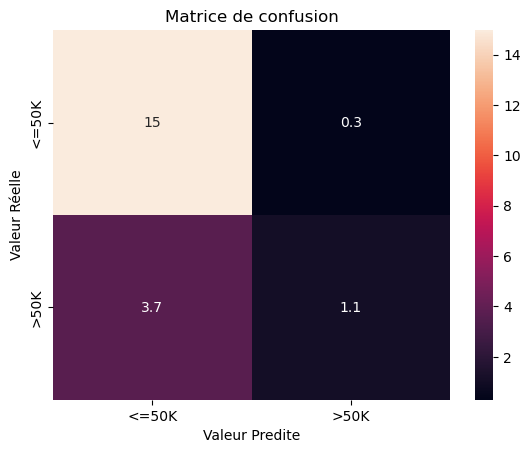

In [27]:
sns.heatmap(conf_matrix, annot=True, yticklabels=['<=50K', '>50K'], xticklabels=['<=50K', '>50K'])
plt.xlabel('Valeur Predite')
plt.ylabel('Valeur Réelle')
plt.title('Matrice de confusion')
plt.show()